## Step 1: Understanding Problem Statement

**Task 1:** - To Prepare a complete data analysis report on the given data.

**Task 2:**- To Create a predictive model  using machine learning techniques to predict the various classes of skin disease.

**Task 3:**- To provide Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.

## Understanding the  Dataset Information:

* This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.


* The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical     features of erythema and scaling, with very little differences.


* The diseases in this group are **psoriasis**, **seboreic dermatitis**, **lichen planus**, **pityriasis rosea**, **cronic dermatitis**, and **pityriasis rubra pilaris**.


* Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. (Histopathology:The study of diseased cells and tissues using a microscope.)


* Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages.**Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.**


* The values of the histopathological features are determined by an analysis of the samples under a microscope.


* In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise.


* The age feature simply represents the age of the patient.


* Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.


* The names and id numbers of the patients were recently removed from the database .



## Step 2: Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 3: Import the data

In [2]:
data=pd.read_csv('skin_disorder.csv')
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [3]:
# to view all the columns present in data
pd.set_option("display.max_columns",None)
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3


In [4]:
#replacing the target column with actual categorical disorder values for better understanding
data['class'].replace([1,2,3,4,5,6],['Psoriasis', 'Seboreic_Dermatitis', 'Lichen_Planus', 'Pityriasis_Rosea','Cronic_Dermatitis','Pityriasis_rubra_pilaris'], inplace=True)

## Step 4: Basic Checks

In [5]:
data.shape #  to see how many columns and rows are present

(366, 35)

In [6]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,Seboreic_Dermatitis
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,Psoriasis
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,Lichen_Planus
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,Psoriasis
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,Lichen_Planus


In [7]:
data.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,Pityriasis_Rosea
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,Pityriasis_Rosea
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,Lichen_Planus
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,Lichen_Planus
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35,Psoriasis


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [9]:
data.dtypes

erythema                                     int64
scaling                                      int64
definite_borders                             int64
itching                                      int64
koebner_phenomenon                           int64
polygonal_papules                            int64
follicular_papules                           int64
oral_mucosal_involvement                     int64
knee_and_elbow_involvement                   int64
scalp_involvement                            int64
family_history                               int64
melanin_incontinence                         int64
eosinophils_in_the_infiltrate                int64
PNL_infiltrate                               int64
fibrosis_of_the_papillary_dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing_of_the_rete_ridges    

## Attribute Information :

### Clinical Attributes:

1. **Erythema:** The presence or absence of redness or inflammation of the skin.

2. **Scaling:** Whether there are visible scales or flakes on the skin's surface.

3. **Definite Borders:** Describes whether the skin lesion has well-defined or clear borders.

4. **Itching:** Indicates whether the patient experiences itching or pruritus associated with the skin condition.

5. **Koebner Phenomenon:** Refers to whether new skin lesions appear at sites of trauma or injury to the skin.

6. **Polygonal Papules:** Presence or absence of polygonal-shaped raised skin lesions.

7. **Follicular Papules:** Whether there are raised lesions involving hair follicles.

8. **Oral Mucosal Involvement:** Indicates if the condition affects the mucous membranes inside the mouth.

9. **Knee and Elbow Involvement:** Describes whether the skin condition is specifically located on the knees and elbows.

10. **Scalp Involvement:** Whether the condition affects the scalp.

11. **Family History(0 or 1):** Indicates whether there is a family history of similar skin conditions or relevant genetic factors.

12. **Age:** The age of the patient at the time of data collection.

_These clinical attributes are important for dermatologists to assess and diagnose various skin conditions accurately. They are used in clinical examinations and research to characterize the presentation and progression of dermatological diseases. Researchers and healthcare providers can analyze these attributes to understand patterns and correlations in different skin conditions and to develop treatment plans tailored to individual patients._


### Histopathological Attributes:


1. **Melanin Incontinence:** Melanin incontinence refers to the presence of melanin pigment within the dermis. It can occur when melanocytes are damaged or when melanin leaks from epidermal cells into the deeper skin layers. Melanin incontinence is often associated with conditions like melanoma and lichen planus.

2. **Eosinophils in the Infiltrate:** Eosinophils are a type of white blood cell involved in allergic and inflammatory responses. The presence of eosinophils in the inflammatory infiltrate can be indicative of certain allergic or eosinophilic skin conditions.

3. **PNL Infiltrate:** PNL (polymorphonuclear leukocyte) infiltrate refers to the presence of polymorphonuclear white blood cells in the skin tissue. PNLs are involved in the early stages of inflammation and can be seen in various inflammatory skin disorders.

4. **Fibrosis of the Papillary Dermis:** Fibrosis in the papillary dermis indicates the accumulation of excessive fibrous tissue in the uppermost layer of the dermis. It can result from chronic inflammation and is often associated with scarring.

5. **Exocytosis:** Exocytosis refers to the migration of inflammatory cells (usually lymphocytes) from the bloodstream into the epidermis. This phenomenon is commonly observed in conditions like psoriasis.

6. **Acanthosis:** Acanthosis is characterized by the thickening of the epidermis, particularly the stratum spinosum layer. It is a common histological finding in conditions like acanthosis nigricans and psoriasis.

7. **Hyperkeratosis:** Hyperkeratosis is the excessive thickening of the stratum corneum, the outermost layer of the epidermis. It leads to the formation of a thickened, keratinized surface and can be seen in various skin disorders.

8. **Parakeratosis:** Parakeratosis is a histological feature where nuclei are retained in the stratum corneum. It is often seen in psoriasis and other hyperproliferative skin conditions.

9. **Clubbing of the Rete Ridges:** Clubbing of the rete ridges refers to the bulbous enlargement of the rete ridges, which are the finger-like projections of the epidermis into the dermis. This can be seen in conditions like lichen planus.

10. **Elongation of the Rete Ridges:** Elongation of the rete ridges indicates the lengthening of these epidermal projections into the dermis. It is a common finding in many skin diseases.

11. **Thinning of the Suprapapillary Epidermis:** This feature involves a reduction in the thickness of the suprapapillary epidermis, which is the epidermal layer above the dermal papillae. It can be observed in some inflammatory skin conditions.

12. **Spongiform Pustule:** A spongiform pustule is a blister-like structure filled with neutrophils and located within the epidermis. It is characteristic of pustular psoriasis.

13. **Munro Microabscess:** Munro microabscesses are small collections of neutrophils in the stratum corneum. They are commonly found in the epidermis of individuals with psoriasis.

14. **Focal Hypergranulosis:** Focal hypergranulosis refers to localized thickening of the granular layer of the epidermis. This can be seen in various skin disorders.

15. **Disappearance of the Granular Layer:** In some skin conditions, the granular layer of the epidermis may be absent or significantly reduced.

16. **Vacuolization and Damage of Basal Layer:** Vacuolization refers to the formation of empty spaces (vacuoles) within the basal layer of the epidermis. It is often associated with autoimmune blistering disorders.

17. **Spongiosis:** Spongiosis is the presence of intercellular edema (fluid accumulation between epidermal cells) in the epidermis. It is a common feature of eczematous conditions.

18. **Saw-tooth Appearance of Rete Ridges:** The saw-tooth appearance is characterized by irregular, jagged projections of the epidermal rete ridges and is often seen in lichen planus.

19. **Follicular Horn Plug:** A follicular horn plug is a collection of keratinous material within a hair follicle. It can be seen in various conditions, including acne.

20. **Perifollicular Parakeratosis:** Perifollicular parakeratosis is the presence of parakeratosis around hair follicles. It can be observed in certain inflammatory skin conditions.

22. **Inflammatory Mononuclear Infiltrate:** This refers to the presence of mononuclear white blood cells (such as lymphocytes) in the dermal or epidermal infiltrate, indicating chronic inflammation.

23. **Band-like Infiltrate:** A band-like infiltrate is characterized by a dense, linear accumulation of inflammatory cells within the skin tissue. It can be seen in conditions like lichen planus.


_These histopathological attributes provide crucial information for dermatopathologists and researchers to diagnose and classify various skin disorders accurately. They aid in understanding the underlying histological changes associated with different dermatological conditions._


### Class of Diseases
The diseases in this group are

1. **Psoriasis(1)**,
2. **Seboreic Dermatitis(2)**,
3. **Lichen Planus(3)**,
4. **Pityriasis Rosea(4)**,
5. **Cronic Dermatitis(5)**,
6. **Pityriasis Rubra Pilaris(6)**.

In [9]:
# checking unique values in each column
for col in data:
    print(f'*****************{col}**********************\n')
    print(f'unique values in {col} are:',data[col].unique())
    print('The value counts of each unqiue values are :')
    print(data[col].value_counts())
    print('\n')

*****************erythema**********************

unique values in erythema are: [2 3 1 0]
The value counts of each unqiue values are :
2    215
3     90
1     57
0      4
Name: erythema, dtype: int64


*****************scaling**********************

unique values in scaling are: [2 3 1 0]
The value counts of each unqiue values are :
2    195
1    111
3     52
0      8
Name: scaling, dtype: int64


*****************definite_borders**********************

unique values in definite_borders are: [0 3 2 1]
The value counts of each unqiue values are :
2    168
1     93
0     59
3     46
Name: definite_borders, dtype: int64


*****************itching**********************

unique values in itching are: [3 2 0 1]
The value counts of each unqiue values are :
0    118
2    100
3     76
1     72
Name: itching, dtype: int64


*****************koebner_phenomenon**********************

unique values in koebner_phenomenon are: [0 1 2 3]
The value counts of each unqiue values are :
0    224
1     70
2

In [10]:
# we can see that the data type of 'Age' columns is object we have to convert them to integer but there's one problem with data
# set there are some invalid values
#we can use Use the pd.to_numeric function with the errors='coerce' parameter to convert the column to numeric,
# and invalid values will be replaced with NaN.
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')



In [11]:
data['Age'].isna().sum()

8

In [12]:
#now replacing this nan values with median
data['Age']=data['Age'].fillna(data['Age'].median())

In [13]:
#now converting data type of 'Age' column to int64
data['Age']=data['Age'].astype('int64')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

## Step 5: EDA
As per the information provided, Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.

- **Clinical Features:** Erythema, Scaling, Definite_borders, Itching, Koebner_phenomenon, Polygonal_papules, Follicular_papules, Oral_mucosal_involvement, Knee_and_elbow_involvement, Scalp_involvement, Family_history, and Age.

- **Histopathological features:** Melanin_incontinence, Eosinophils_in_the_infiltrate, PNL_infiltrate, Fibrosis_of_the_papillary_dermis, Exocytosis, Acanthosis, Hyperkeratosis, Parakeratosis, Clubbing_of_the_rete_ridges, Elongation_of_the_rete_ridges, Thinning_of_the_suprapapillary_epidermis, Spongiform_pustule, Munro_microabcess, Focal_hypergranulosis, Disappearance_of_the_granular_layer, Vacuolisation_and_damage_of_basal_layer, Spongiosis, Saw-tooth_appearance_of_retes, Follicular_horn_plug, Perifollicular_parakeratosis, Inflammatory_monoluclear_inflitrate, Band-like_infiltrate.

### Count and Distribution of Clinical_features

In [18]:
clinical_features=['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history']

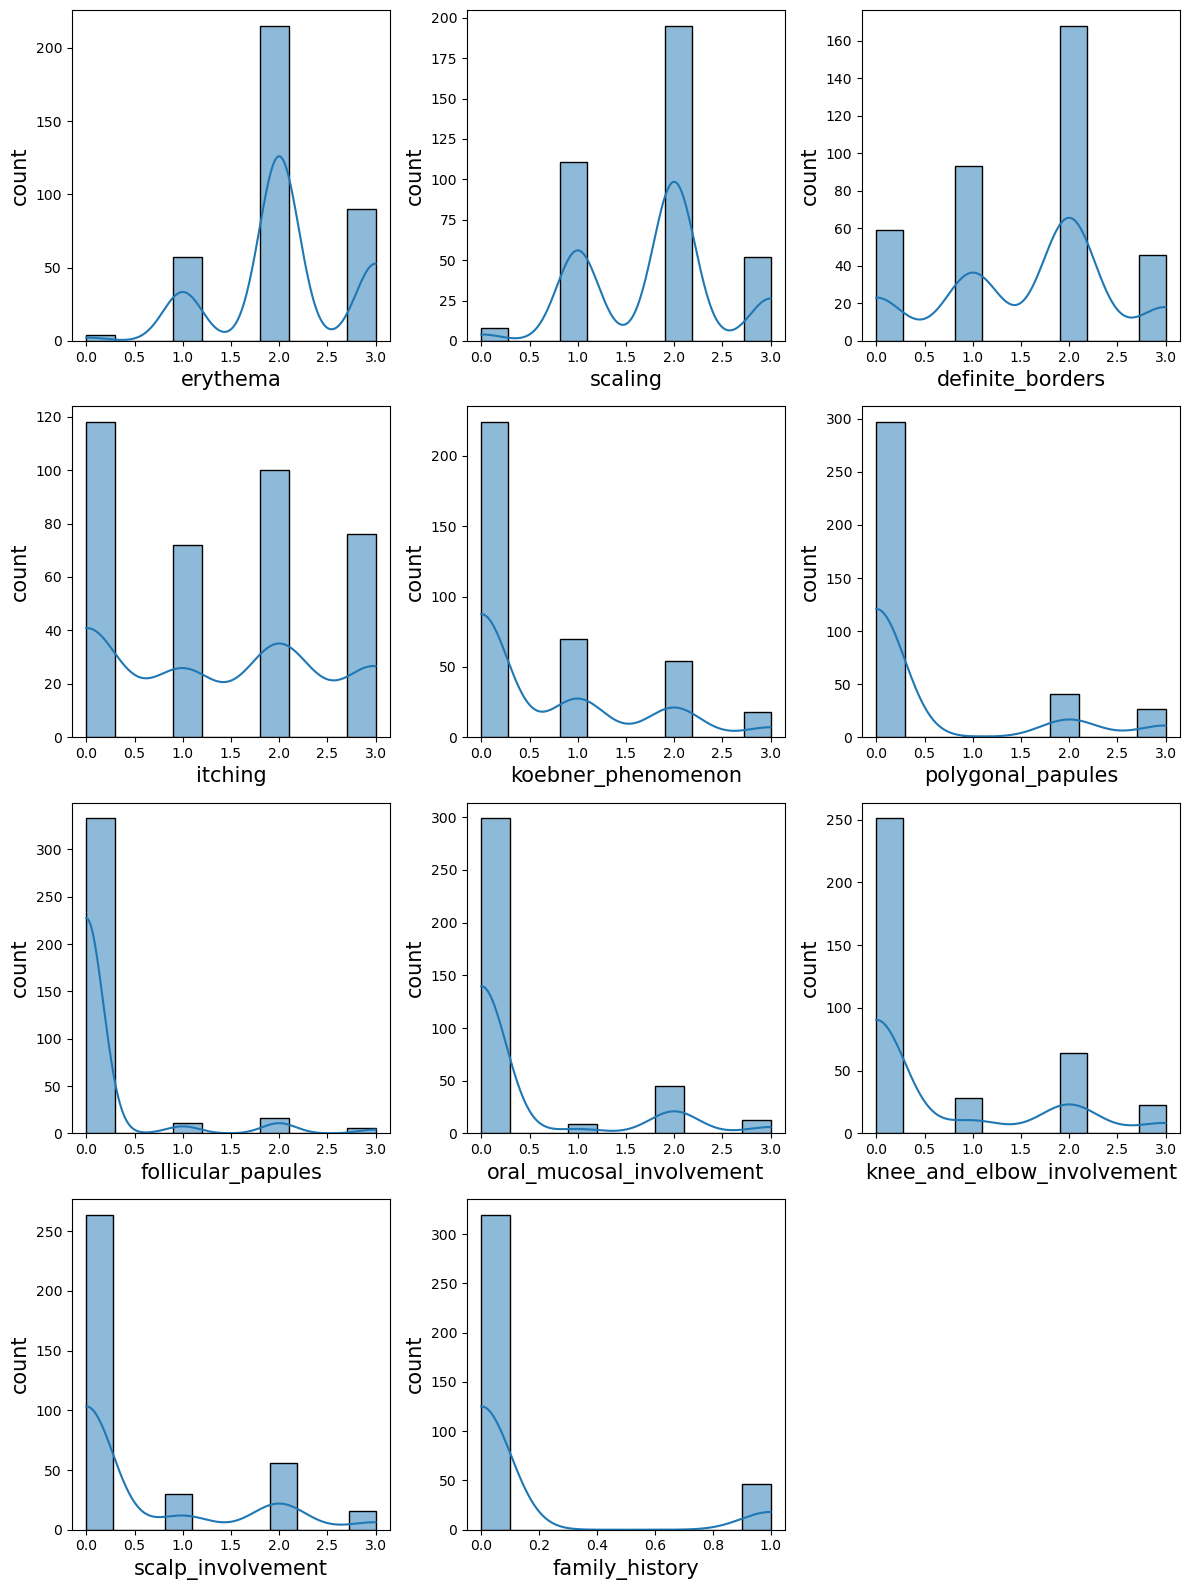

In [19]:
# histplot
plt.figure(figsize=(12,16), facecolor='white')
plotnumber = 1

for clinical_features in data:
    if plotnumber<=11 :
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(x=data[clinical_features],kde=True)
        plt.xlabel(clinical_features,fontsize=15)
        plt.ylabel('count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

Insights:
The histogram allows us to visualize the distribution of a numerical variable, such as the 'age' column in your DataFrame. By plotting a histogram, we can understand the frequency and range of ages present in our dataset. This can help identify patterns or anomalies in the age distribution, such as whether it is skewed, normally distributed, or has any significant peaks or gaps.

### Count and Distribution of histopath_features

In [110]:
histopath_features = ['melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']

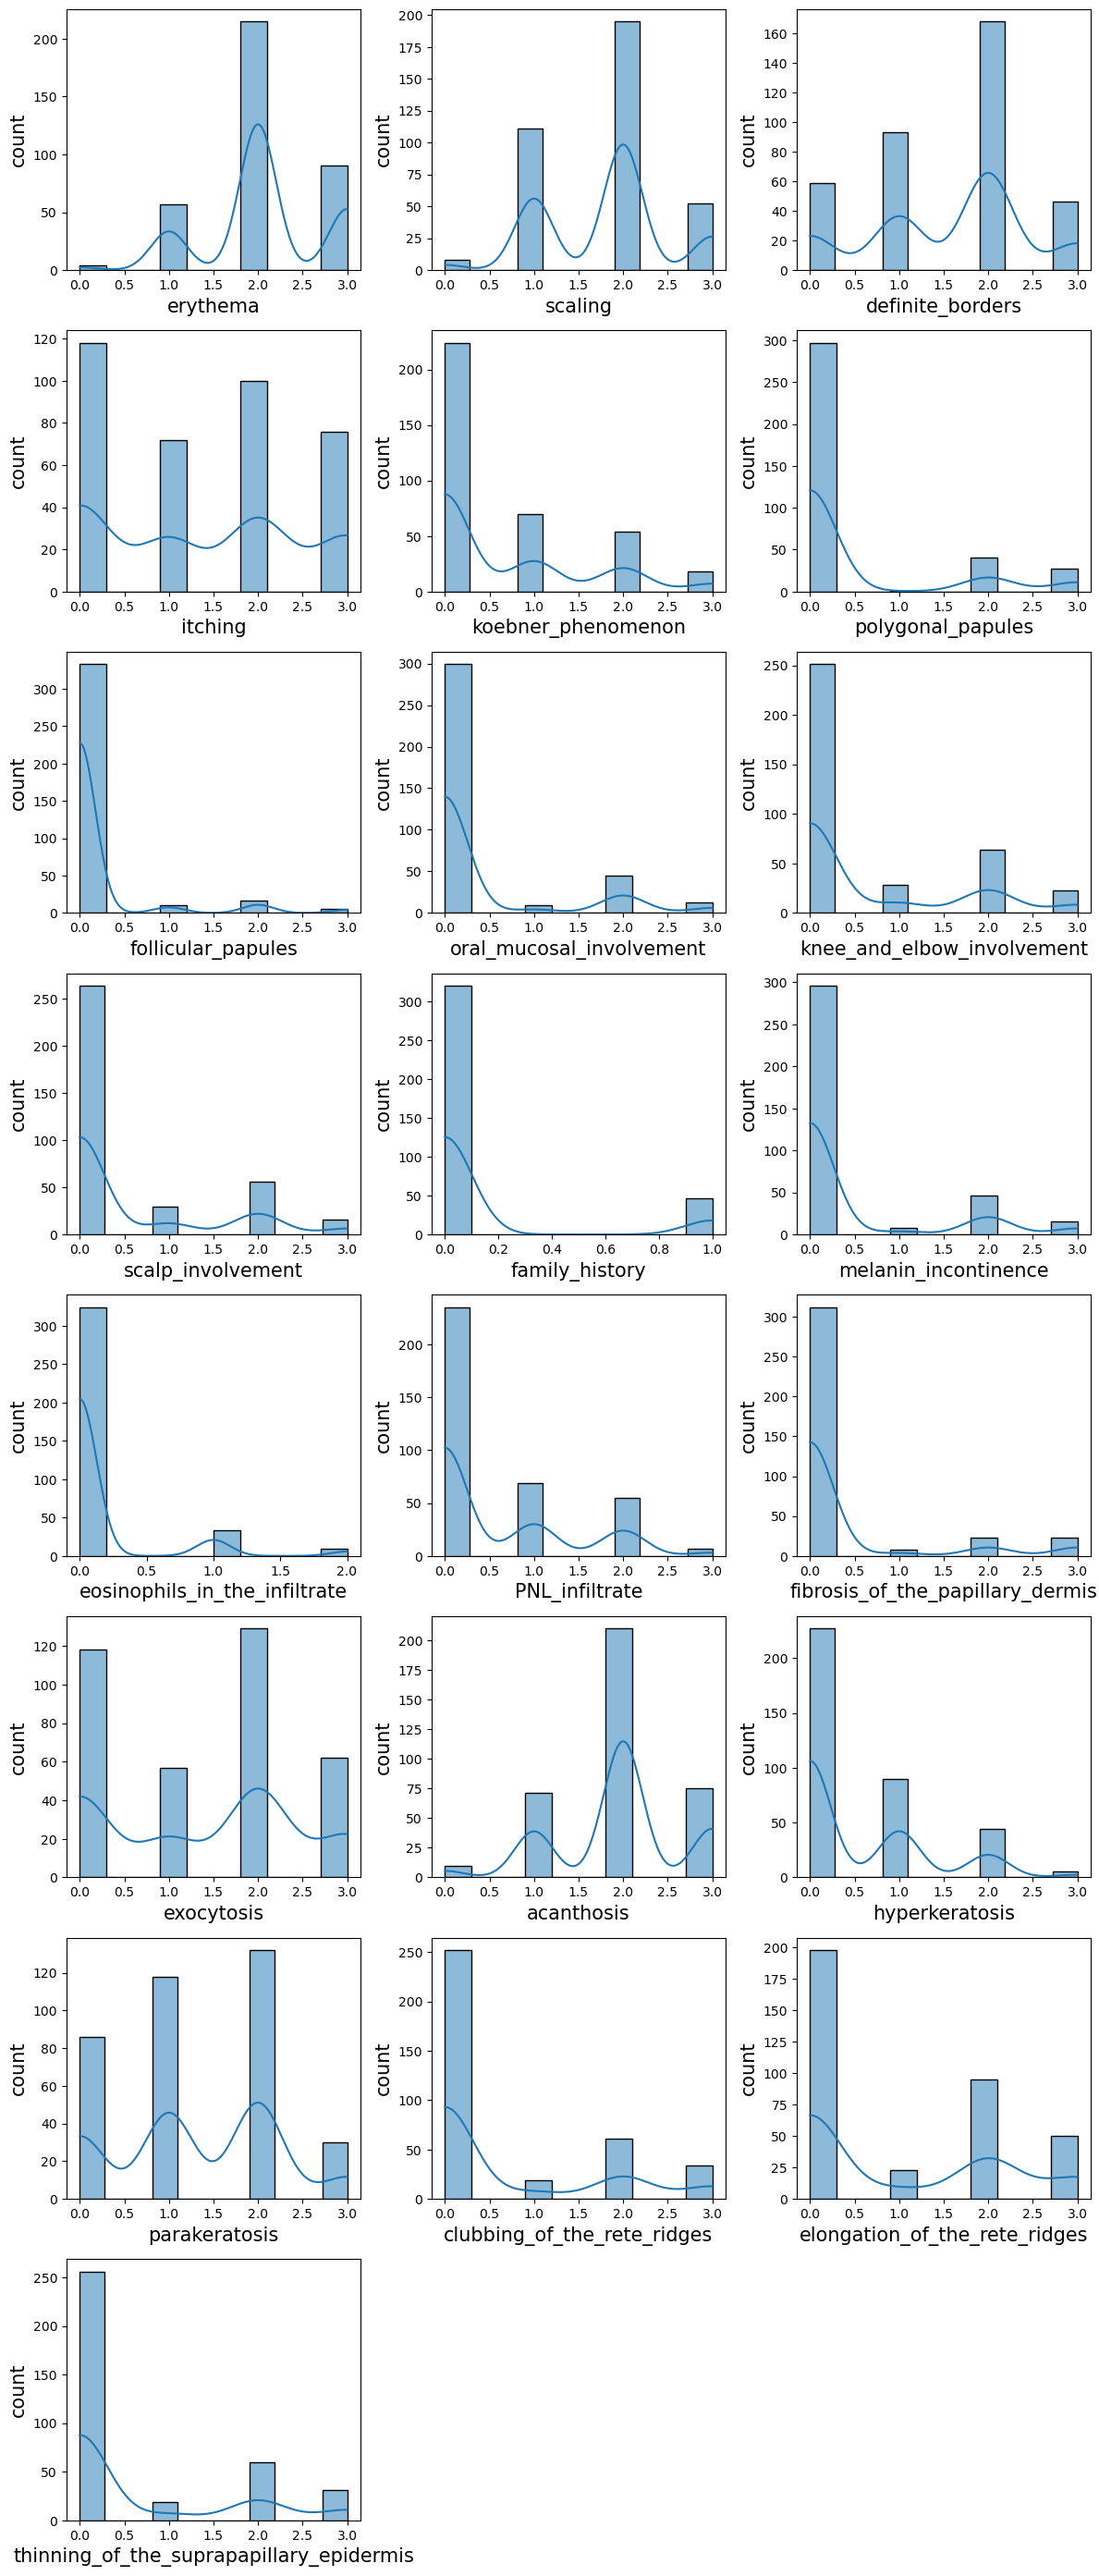

In [111]:
# histplot
plt.figure(figsize=(12,28), facecolor='white')
plotnumber = 1

for histopath_features in data:
    if plotnumber<=22 :
        ax = plt.subplot(8,3,plotnumber)
        sns.histplot(x=data[histopath_features],kde=True)
        plt.xlabel(histopath_features,fontsize=15)
        plt.ylabel('count',fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

## Distribution and Count of Classes of Skin Disorders

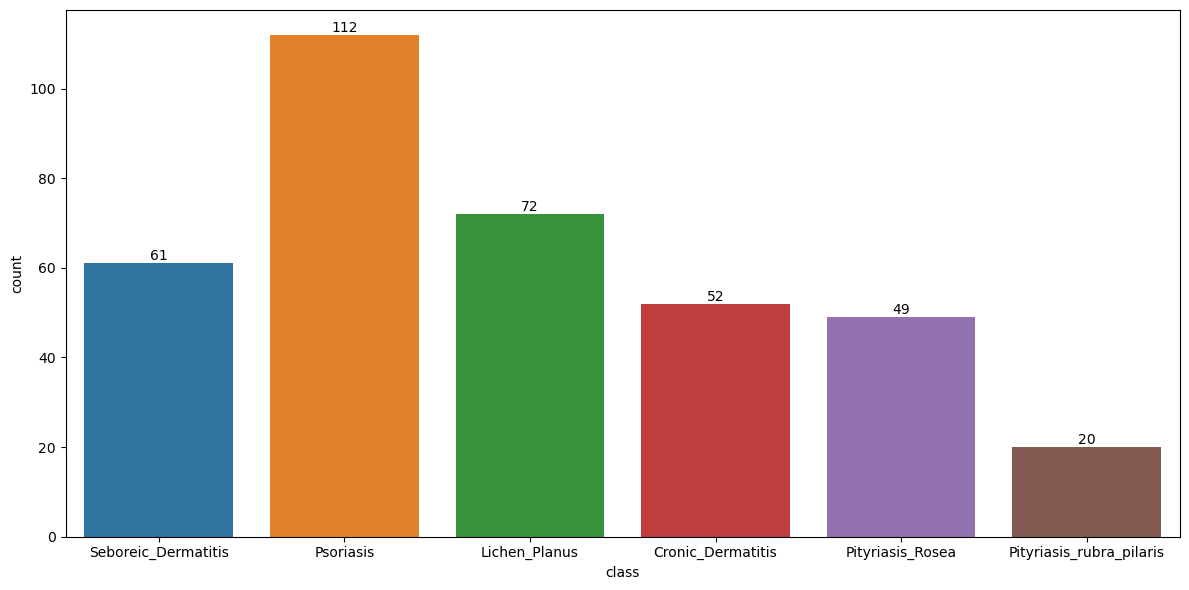

In [114]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['class'])
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()

### Insights:
-The bar plot is useful for visualizing the frequency or count of different categories in a categorical variable, such as the 'class' column in our DataFrame. By plotting a count plot, we can compare the number of instances for each class and gain insights into the class distribution. This visualization can reveal class imbalances, identify dominant or minority classes, or provide an overview of the distribution of the target variable.


-from above plot we can see the Psoriasis disorder is having the highest number followed by the Lichen_planus then seboreic_Dermatitis  then cronic_dermatitis then pityriasis_rosea and lowest is of pityriasis_rubra_pilaris

## INSIGHTS FROM EDA:

* **The distribution of 12 clinical features and 22 histopathological features in the dataset with 366 instances is depicted using histogram and KDE plot.**


* **Dieseases like Lichen_Planus, Cronic_Dermatitis,and Pityriasis_Rosea does not show any relation of tranfer within family members. Also, theses diseases can occurs in early ages till the age of 70 years is also as seen from the distribution.**


* **Diseases like Psoriasis and Pityriasis_rubra_pilaris shows strong relation of transfer from family and disease Seboreic_Dermatitis too shows a some relation of transfer within family members.**


* **Disease like Pityriasis_rubra_pilaris shows its presence in early ages and till the age of 15 to 20 years only.**


* **Diseases like Psoriasis and Seboreic_Dermatitis shows its presence in early ages and till the age of 70 years.**


* **The Disease / target class count plot showed imbalanced values between diffrent classes which was balanced using combination of SMOTE and edited nearest neighbor technique.**




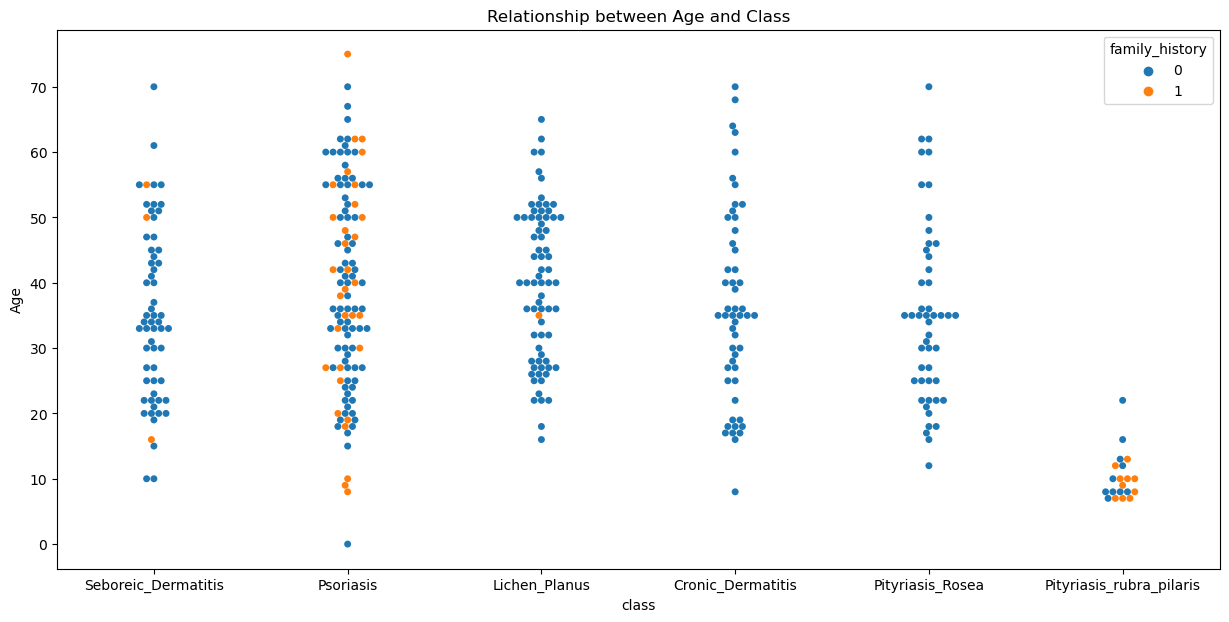

In [120]:
plt.figure(figsize=(15,7))
sns.swarmplot(y="Age", x="class", data=data, hue='family_history')
plt.title('Relationship between Age and Class')
plt.show()

### OBSERVATIONS:
- Pityriasis_Rubra_Pilaris is only found ages below 20. This disease show high relation with family_history. It was observed in family_history of almost half of the patients.
- Except Pityriasis_Rubra_Pilaris, remaining class of diseases are found in almost all the ages.
- Psoriasis is also significantly related to the family history.

## Step 6: Data PreProcessing

In [15]:
#checking for null values
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [16]:
#check for duplicates
data.duplicated().sum()

0

In [17]:
#check for outlier: no need to check for outleirs or to clear them as our data doesn't  have continous values

In [18]:
#Encoding
#we need to convert the target column to the numerical one
#we are using the mapping to convert
data['class']=data['class'].map({'Psoriasis':0,'Seboreic_Dermatitis':1,'Lichen_Planus':2,'Pityriasis_Rosea':3,'Cronic_Dermatitis':4,'Pityriasis_rubra_pilaris':5})

In [19]:
#Scaling
#since we dont have the continous values columns scaling is not required

In [20]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,1
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,0
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,2
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,0
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,2


## Step 7: Feature Engineering

In [24]:
#chekcing the correlation
corr_matrix = data.corr()

corr_matrix

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,0.172059,0.042126,0.075228,0.224095,-0.354595,0.021565,0.064165,-0.055432,0.210030,0.157558,0.007819,0.167868,0.169773,0.113464,-0.013761,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.003724,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,0.181491,-0.074856,0.042211,0.282486,-0.383585,-0.110809,0.108095,0.013149,0.296752,0.320740,0.139073,0.330343,0.297783,0.186366,-0.085021,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,0.017285,-0.468688
definite_borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,0.115844,0.311398,-0.132021,0.041330,-0.274414,-0.205391,0.189761,0.043894,0.361213,0.387205,0.201702,0.369266,0.246204,0.242232,0.291147,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.137866,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,-0.136615,0.359207,0.095434,-0.145288,0.203032,0.214822,0.067080,-0.008460,-0.075568,-0.232224,-0.124058,-0.244052,-0.152689,-0.056056,0.363488,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.046546,0.054772
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,-0.083247,0.385687,-0.046366,-0.169377,-0.247451,0.145960,-0.054449,0.002635,-0.036801,0.008471,-0.163819,0.026064,-0.002065,0.157646,0.400409,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.080599,-0.091323
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,-0.151841,0.907044,0.028824,-0.314515,-0.158046,0.379643,0.129210,-0.164355,-0.042098,-0.294857,-0.400544,-0.287468,-0.206530,-0.201893,0.880972,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.095935,0.057785
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,0.192866,-0.136165,-0.087452,-0.119728,0.019698,-0.010869,-0.096592,0.189201,-0.029654,-0.115856,-0.105356,-0.128361,-0.057283,-0.095856,-0.118710,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.370436,0.477813
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,-0.151825,0.869231,0.014122,-0.303735,-0.140047,0.360138,0.101565,-0.155177,-0.039258,-0.284750,-0.386815,-0.277615,-0.199452,-0.190861,0.884351,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.110527,0.055805
knee_and_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,0.341915,-0.272314,-0.198670,0.331709,-0.227428,-0.529946,0.116711,0.229538,0.439951,0.721602,0.496067,0.644669,0.447252,0.518155,-0.267508,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.077278,-0.383305
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,0.292728,-0.256779,-0.076957,0

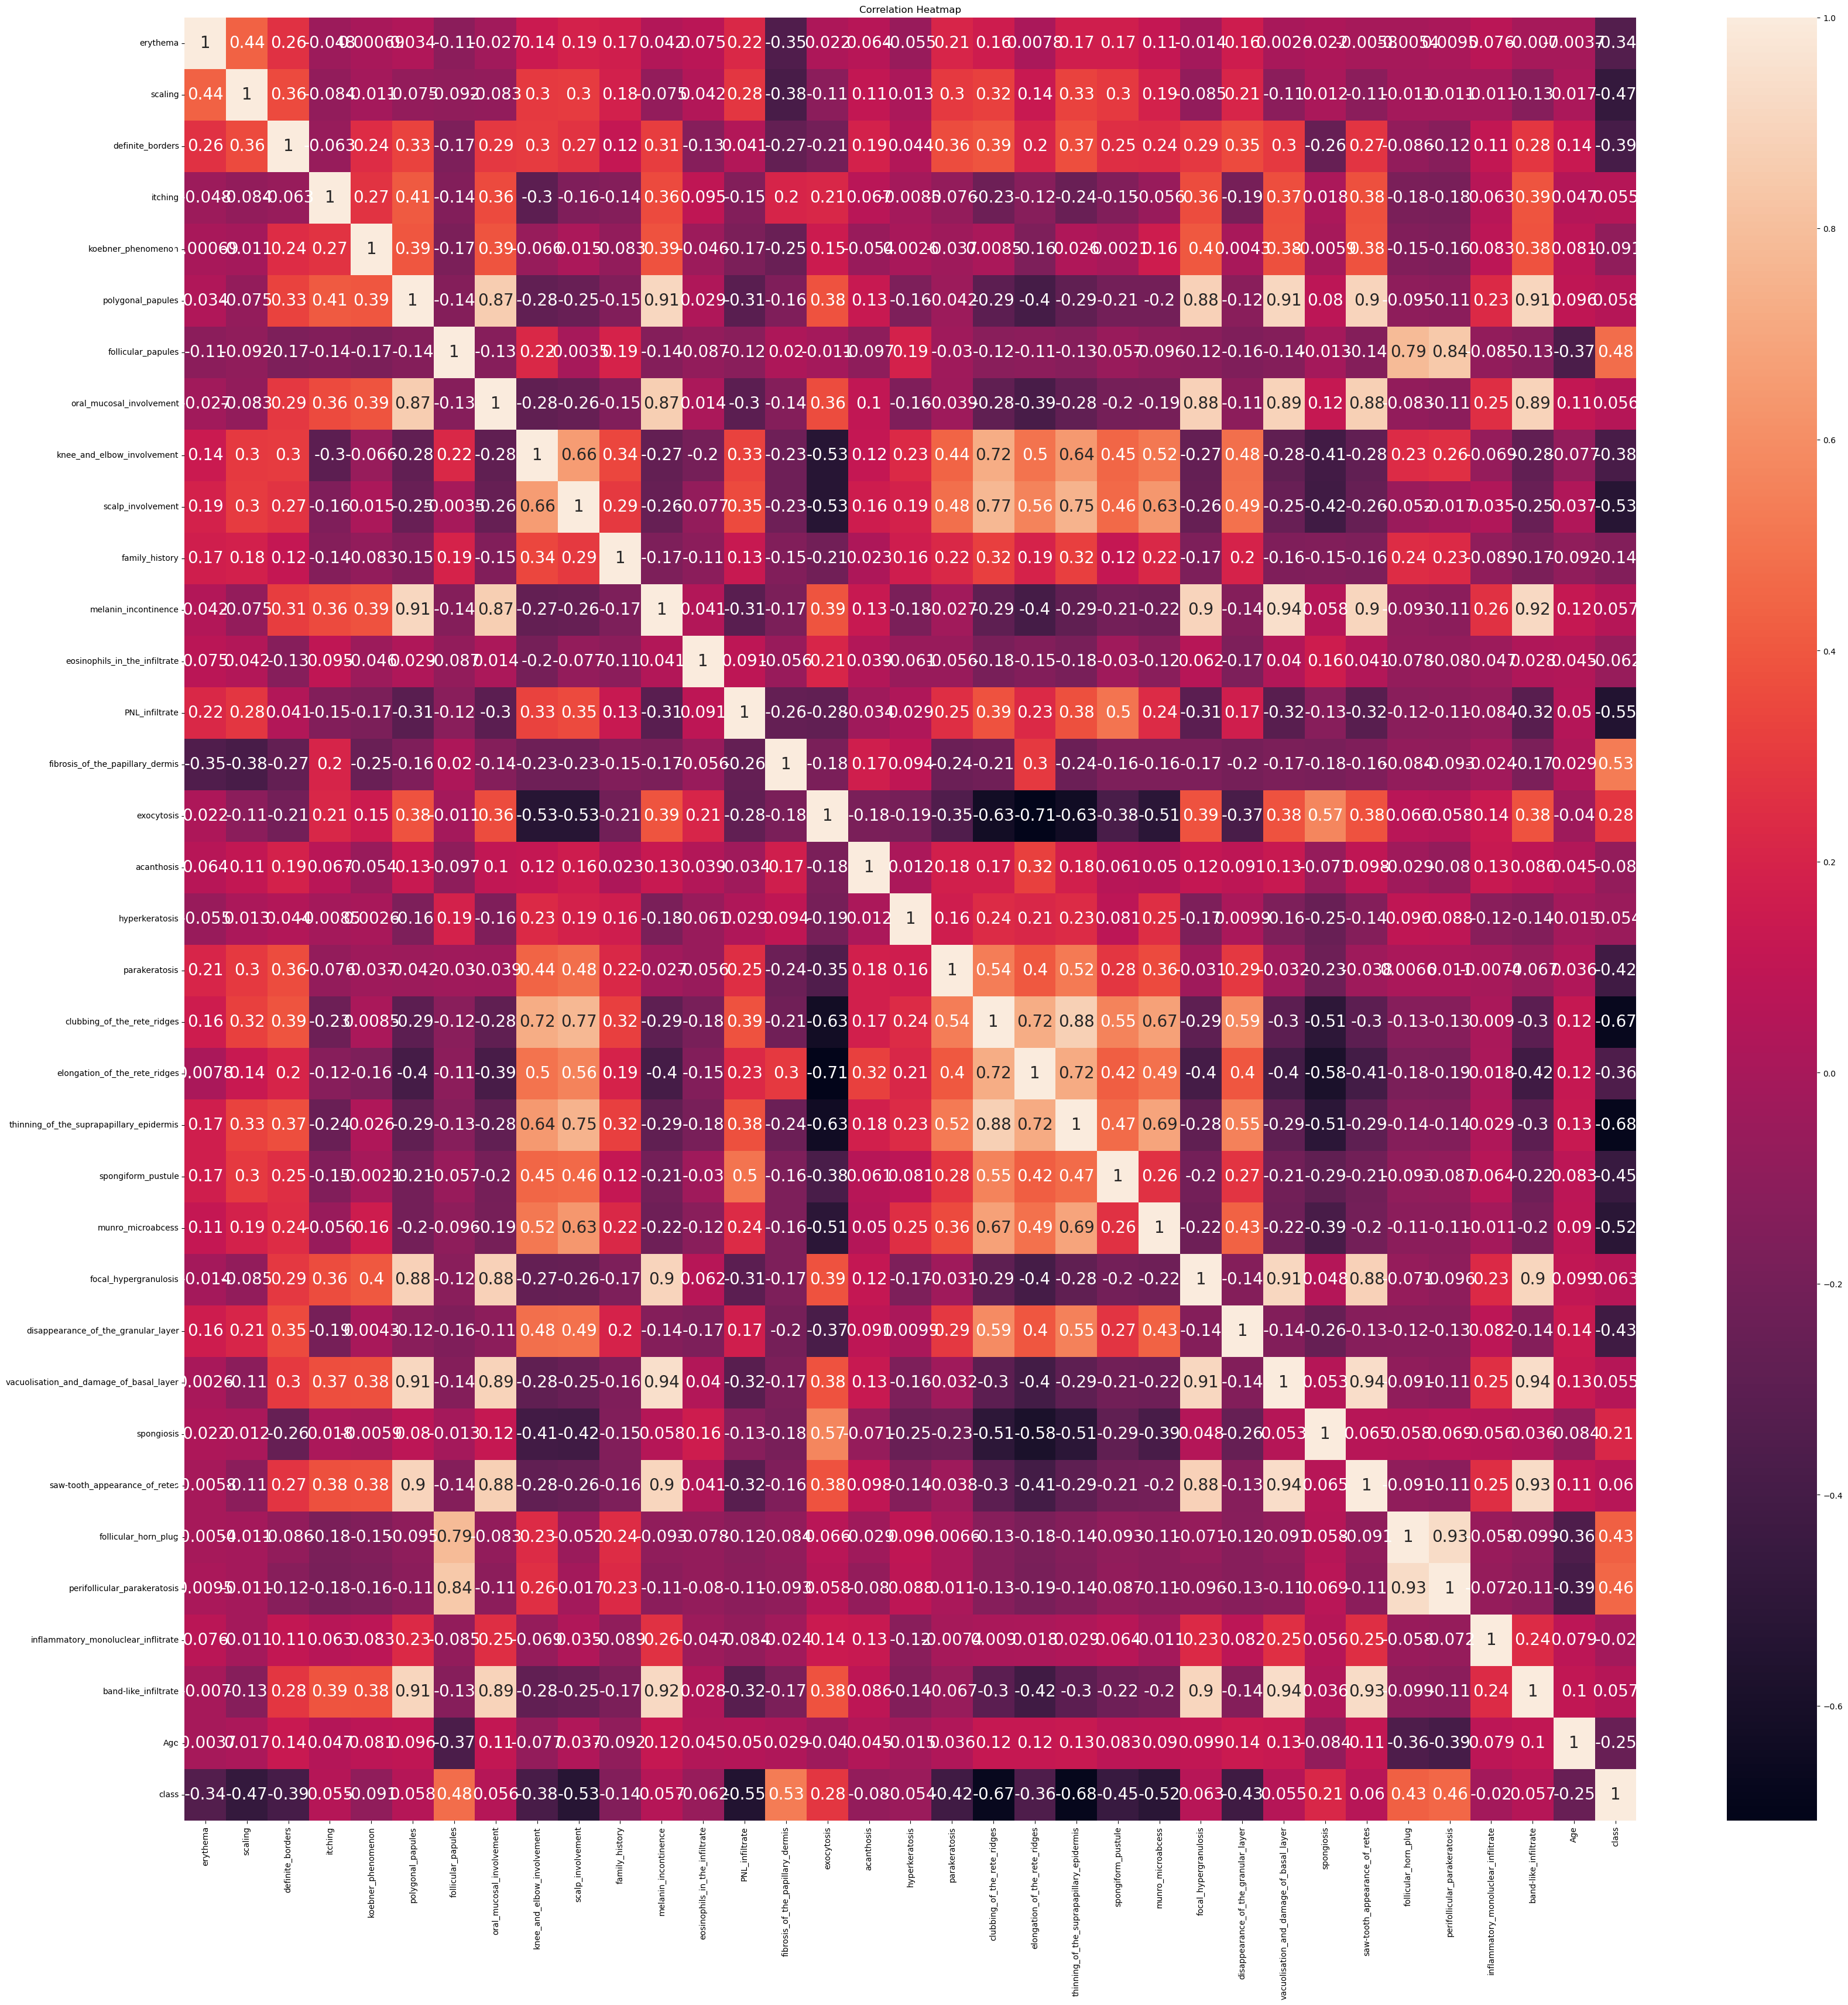

In [28]:
plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=True,annot_kws={"size":20})
plt.title('Correlation Heatmap')
plt.show()

## Step 8: Splitting the data 

In [24]:
x=data.drop(['class'],axis=1)
y=data['class']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [25]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [26]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [27]:
from collections import Counter

In [29]:
print('before ballancing:',Counter(y_train))
print('after ballancing :',Counter(y_sm))

before ballancing: Counter({0: 72, 2: 55, 1: 41, 4: 38, 3: 36, 5: 14})
after ballancing : Counter({3: 72, 4: 72, 0: 72, 1: 72, 2: 72, 5: 72})


## Model Building

### 1} Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
model1=LogisticRegression()
model1.fit(x_sm,y_sm)

LogisticRegression()

In [42]:
y_pred1=model1.predict(x_test)

In [50]:
print("accuracy score:", accuracy_score(y_test,y_pred1))

accuracy score: 0.9818181818181818


In [44]:
print(classification_report(y_test, y_pred1, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.95      0.95      0.95        20
           lichen_planus       1.00      1.00      1.00        17
        pityriasis_rosea       0.92      0.92      0.92        13
       cronic_dermatitis       1.00      1.00      1.00        14
pityriasis_rubra_pilaris       1.00      1.00      1.00         6

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110



### 2} KNN-Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(x_sm,y_sm)

KNeighborsClassifier()

In [51]:
y_pred2=model2.predict(x_test)

In [52]:
print("accuracy score:", accuracy_score(y_test,y_pred2))

accuracy score: 0.8545454545454545


In [54]:
print(classification_report(y_test, y_pred2, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      0.95      0.97        40
     seboreic_dermatitis       0.75      0.60      0.67        20
           lichen_planus       1.00      1.00      1.00        17
        pityriasis_rosea       0.56      0.77      0.65        13
       cronic_dermatitis       1.00      0.79      0.88        14
pityriasis_rubra_pilaris       0.60      1.00      0.75         6

                accuracy                           0.85       110
               macro avg       0.82      0.85      0.82       110
            weighted avg       0.88      0.85      0.86       110



##### Lets perform Hyperparameter tunning on KNN-Classifier

In [62]:
from sklearn.model_selection import  GridSearchCV
knn_classifier=KNeighborsClassifier()

params_KNN= {
    'n_neighbors': np.arange(1, 21),  
    'weights': ['uniform', 'distance'],
     'metric':['minkowski', 'chebyshev','euclidean','manhattan'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  
}

grid_search = GridSearchCV(estimator=knn_classifier, param_grid=params_KNN, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [64]:
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=params_KNN, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [70]:
#lets try to fit hyperparametrs 
model3=KNeighborsClassifier(algorithm='auto',metric='minkowski',n_neighbors=5,p=1,weights='distance')
model3.fit(x_sm,y_sm)

KNeighborsClassifier(p=1, weights='distance')

In [71]:
y_pred3=model3.predict(x_test)

In [83]:
print("accuracy score:", accuracy_score(y_test,y_pred3))

accuracy score: 0.9


In [84]:
print(classification_report(y_test, y_pred3, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      0.97      0.99        40
     seboreic_dermatitis       0.87      0.65      0.74        20
           lichen_planus       1.00      1.00      1.00        17
        pityriasis_rosea       0.58      0.85      0.69        13
       cronic_dermatitis       0.93      0.93      0.93        14
pityriasis_rubra_pilaris       1.00      1.00      1.00         6

                accuracy                           0.90       110
               macro avg       0.90      0.90      0.89       110
            weighted avg       0.92      0.90      0.90       110



### Insights For KNN Classifier:
* in this algorithm we tried to predict the output both without and with Hyper parameter tuning
* model2----> is KNNClassifier without Hyperparameter tuning and we got accuracy score of 0.85 which is good enough
* model3----> is KNNClassifier with Hyperparameter tuning and we improved the accuracy score to 0.9 that is almost 5%


### 3} Support Vector Classifier

In [73]:
from sklearn.svm import SVC
model4=SVC()
model4.fit(x_sm,y_sm)

SVC()

In [74]:
y_pred4=model4.predict(x_test)

In [75]:
print('Accuracy Score:',accuracy_score(y_test,y_pred4))

Accuracy Score: 0.8090909090909091


In [76]:
print(classification_report(y_test, y_pred4, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.97      0.95      0.96        40
     seboreic_dermatitis       0.60      0.30      0.40        20
           lichen_planus       1.00      1.00      1.00        17
        pityriasis_rosea       0.40      0.62      0.48        13
       cronic_dermatitis       1.00      1.00      1.00        14
pityriasis_rubra_pilaris       0.60      1.00      0.75         6

                accuracy                           0.81       110
               macro avg       0.76      0.81      0.77       110
            weighted avg       0.83      0.81      0.80       110



##### Lets perform Hyperparameter tunning on SVM-Classifier

In [77]:
from sklearn.model_selection import  GridSearchCV
svm_classifier=SVC()


params_SVC = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of the polynomial kernel (for poly kernel)
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient (scale for 'rbf', 'poly', and 'sigmoid')
}


In [78]:
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=params_SVC, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [80]:
# lets try to fit hyperparameters
model5=SVC(C=0.1,degree=2,gamma='scale',kernel='linear')
model5.fit(x_sm,y_sm)

SVC(C=0.1, degree=2, kernel='linear')

In [81]:
y_pred5=model5.predict(x_test)

In [82]:
print('accuracy score:',accuracy_score(y_test,y_pred5))

accuracy score: 0.9636363636363636


In [85]:
print(classification_report(y_test, y_pred5, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))


                          precision    recall  f1-score   support

               psoriasis       1.00      0.97      0.99        40
     seboreic_dermatitis       0.95      0.90      0.92        20
           lichen_planus       1.00      1.00      1.00        17
        pityriasis_rosea       0.86      0.92      0.89        13
       cronic_dermatitis       1.00      1.00      1.00        14
pityriasis_rubra_pilaris       0.86      1.00      0.92         6

                accuracy                           0.96       110
               macro avg       0.94      0.97      0.95       110
            weighted avg       0.97      0.96      0.96       110



In [91]:
from sklearn.model_selection import cross_val_score
cross_val_score(model5,x_train,y_train,cv=3,scoring='accuracy')

array([0.96511628, 0.95294118, 0.96470588])

### Insights For SVM Classifier:
* in this algorithm we tried to predict the output both without and with Hyper parameter tuning
* model4----> is SVMClassifier without Hyperparameter tuning and we got accuracy score of 0.80 which is good enough
* model5----> is SVMClassifier with Hyperparameter tuning and we improved the accuracy score to 0.96 that is Pretty Good
* also we crossvalidated the scores of model5 and all the 3 times they are almost same

### 4} Decision Tree  Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier
model6=DecisionTreeClassifier()
model6.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [96]:
y_pred6=model6.predict(x_test)

In [97]:
print('accuracy score:',accuracy_score(y_test,y_pred6))

accuracy score: 0.9272727272727272


In [98]:
print(classification_report(y_test, y_pred6, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      0.95      0.97        40
     seboreic_dermatitis       0.90      0.90      0.90        20
           lichen_planus       1.00      0.88      0.94        17
        pityriasis_rosea       0.73      0.85      0.79        13
       cronic_dermatitis       0.93      1.00      0.97        14
pityriasis_rubra_pilaris       0.86      1.00      0.92         6

                accuracy                           0.93       110
               macro avg       0.90      0.93      0.91       110
            weighted avg       0.93      0.93      0.93       110



##### Lets Perform Hyperparameter tuning on Decision Tree Classifier

In [99]:
Dt_classifier=DecisionTreeClassifier()
param_DTC = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [100]:
grid_search = GridSearchCV(estimator=Dt_classifier, param_grid=param_DTC, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [101]:
#Lets try to fit in our model
model7=DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,min_samples_leaf=2,min_samples_split=10)
model7.fit(x_sm,y_sm)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10)

In [105]:
y_pred7=model7.predict(x_test)

In [106]:
print('accuracy score:',accuracy_score(y_test,y_pred7))

accuracy score: 0.9272727272727272


In [107]:
print(classification_report(y_test, y_pred7, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.98      1.00      0.99        40
     seboreic_dermatitis       0.81      0.85      0.83        20
           lichen_planus       1.00      1.00      1.00        17
        pityriasis_rosea       0.82      0.69      0.75        13
       cronic_dermatitis       1.00      1.00      1.00        14
pityriasis_rubra_pilaris       0.83      0.83      0.83         6

                accuracy                           0.93       110
               macro avg       0.91      0.90      0.90       110
            weighted avg       0.93      0.93      0.93       110



### Insights For Decision Tree Classifier:
* in this algorithm we tried to predict the output both without and with Hyper parameter tuning
* model6----> is Decision tree Classifier without Hyperparameter tuning and we got accuracy score of 0.92 which is good enough
* model7----> is Decision Tree Classifier with Hyperparameter tuning and we got the same accuracy score of 0.92 but ther was some what improvement in f1-score,recallscore,precision score 


### 5} Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier
model8=RandomForestClassifier()
model8.fit(x_sm,y_sm)

RandomForestClassifier()

In [114]:
y_pred8=model8.predict(x_test)

In [115]:
print('accuracy score:',accuracy_score(y_test,y_pred8))

accuracy score: 0.9454545454545454


In [116]:
print(classification_report(y_test, y_pred8, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.98      1.00      0.99        40
     seboreic_dermatitis       0.94      0.75      0.83        20
           lichen_planus       1.00      1.00      1.00        17
        pityriasis_rosea       0.80      0.92      0.86        13
       cronic_dermatitis       1.00      1.00      1.00        14
pityriasis_rubra_pilaris       0.86      1.00      0.92         6

                accuracy                           0.95       110
               macro avg       0.93      0.95      0.93       110
            weighted avg       0.95      0.95      0.94       110



##### Lets try hyperparameter tuning on RandomForestClassifier

In [117]:
from sklearn.model_selection import  GridSearchCV
rf_classifier=RandomForestClassifier()

param_rfc= {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [119]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_rfc, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


In [122]:
# lets try to fit the paramters
model9=RandomForestClassifier(criterion='gini',max_depth=15,max_features='log2',min_samples_leaf=2,min_samples_split=2,n_estimators=10)
model9.fit(x_sm,y_sm)

RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=2,
                       n_estimators=10)

In [123]:
y_pred9=model9.predict(x_test)

In [124]:
print('accuracy score:',accuracy_score(y_test,y_pred9))

accuracy score: 0.9727272727272728


In [125]:
print(classification_report(y_test, y_pred9, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.95      0.90      0.92        20
           lichen_planus       1.00      1.00      1.00        17
        pityriasis_rosea       0.92      0.92      0.92        13
       cronic_dermatitis       1.00      1.00      1.00        14
pityriasis_rubra_pilaris       0.86      1.00      0.92         6

                accuracy                           0.97       110
               macro avg       0.95      0.97      0.96       110
            weighted avg       0.97      0.97      0.97       110



### Insights For RandomForest Classifier:
* in this algorithm we tried to predict the output both without and with Hyper parameter tuning
* model8----> is RandomForestClassifier without Hyperparameter tuning and we got accuracy score of 0.94 which is good enough
* model9----> is RandomForestClassifier with Hyperparameter tuning and we improved the accuracy score to 0.97 that is Pretty Good
* also we done cross validation of scores on this model and we got the best as all came same

### 6} Gradient Boosting Classifier

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
model10=GradientBoostingClassifier()
model10.fit(x_sm,y_sm)

GradientBoostingClassifier()

In [138]:
y_pred10=model10.predict(x_test)

In [139]:
print('accuracy score:',accuracy_score(y_test,y_pred10))

accuracy score: 0.9545454545454546


In [140]:
print(classification_report(y_test, y_pred10, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.98      1.00      0.99        40
     seboreic_dermatitis       0.94      0.80      0.86        20
           lichen_planus       1.00      1.00      1.00        17
        pityriasis_rosea       0.86      0.92      0.89        13
       cronic_dermatitis       1.00      1.00      1.00        14
pityriasis_rubra_pilaris       0.86      1.00      0.92         6

                accuracy                           0.95       110
               macro avg       0.94      0.95      0.94       110
            weighted avg       0.96      0.95      0.95       110



### 7} XGBoostClassifier

In [147]:
from xgboost import XGBClassifier
model11 = XGBClassifier()
model11.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [148]:
y_pred11=model11.predict(x_test)

In [149]:
print('accuracy score',accuracy_score(y_test,y_pred11))

accuracy score 0.9727272727272728


In [150]:
print(classification_report(y_test, y_pred11, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.90      0.95      0.93        20
           lichen_planus       1.00      1.00      1.00        17
        pityriasis_rosea       0.92      0.85      0.88        13
       cronic_dermatitis       1.00      1.00      1.00        14
pityriasis_rubra_pilaris       1.00      1.00      1.00         6

                accuracy                           0.97       110
               macro avg       0.97      0.97      0.97       110
            weighted avg       0.97      0.97      0.97       110



### 8} ANN Classifier

In [151]:
from sklearn.neural_network import MLPClassifier # MLP stands for Multi Layer Perceptron
ANN_CLF = MLPClassifier()
ANN_CLF.fit(x_sm,y_sm)

MLPClassifier()

In [152]:
y_predict=ANN_CLF.predict(x_test)

In [153]:
print('accuracy score:',accuracy_score(y_test,y_predict))

accuracy score: 0.9818181818181818


In [154]:
print(classification_report(y_test, y_predict, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.95      0.95      0.95        20
           lichen_planus       1.00      1.00      1.00        17
        pityriasis_rosea       0.92      0.92      0.92        13
       cronic_dermatitis       1.00      1.00      1.00        14
pityriasis_rubra_pilaris       1.00      1.00      1.00         6

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110



## Graphical Representation of Model Perfomance

In [155]:
l1=[0.98,0.9,0.96,0.92,0.97,0.95,0.97,0.98]
names=['LogisticReg','KNNClassifier','SVC','DecisionTreeClassifier','RandomforestClassifier','GBClassifier','XGBClassifier','ANNClassifier']

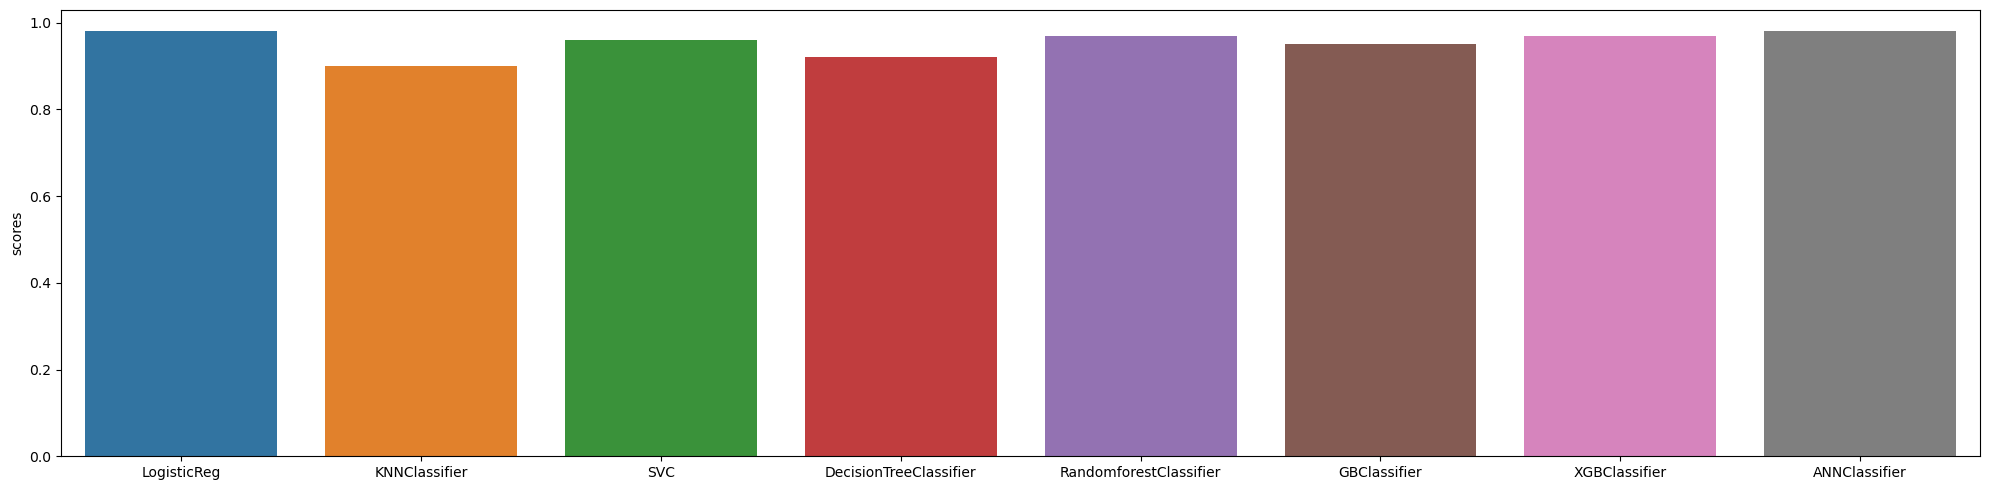

In [164]:
plt.figure(figsize=(20,5))
plt.ylabel('scores')
sns.barplot(x=names,y=l1)
plt.tight_layout()

### insights from graph
* All the models gave us accuracy score greater than the 0.90 
* almost all model gave good results
* we will go with random forest classifier model

#### Finalizing the model
* as we are choosing randomforestclassifier the model we will choose is  "model9"

In [165]:
import pickle as pkl
pkl.dump(model9,open("skin.pkl","wb"))
read=pkl.load(open("skin.pkl","rb"))


In [167]:
pd.set_option('display.max_columns',None)

In [169]:
data.head(10)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,1
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,0
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,2
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,0
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,2
5,2,3,2,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,41,1
6,2,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,18,4
7,2,2,3,3,3,3,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,0,2,2,3,2,0,0,3,3,57,2
8,2,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,22,3
9,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,30,3


#### Lets Check How model performs to input

In [178]:
### checking the model how it works for input
input_data=[3,1,0,1,2,0,1,2,0,1,0,1,1,0,0,1,1,0,1,0,1,2,0,1,0,2,2,1,1,0,1,1,1,55]
e=read.predict([input_data])[0]
print(e,'\n')
if e==0:
    print('Patient has Psoriasis')
elif e==1:
    print('Patient has Seboreic_Dermatitis')
elif e==2:
    print('Patient has Lichen_planus')
elif e==3:
    print('patien has Pityriasis_Rosea' )
elif e==4:
    print('patient has Cronic_Dermatitis')
else:
    print('patient has Pityriasis_rubra_pilaris')
    

5 

patient has Pityriasis_rubra_pilaris


## SUMMARY

* **The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.**


* **The Primary objective is to build a machine learning techniques, which can effectively differentiate skin disease classification.**

## METHODOLOGY FOLLOWED



* **The dataset contains  12 clinical features and 22 histopathological features, the feature family history has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.**


* **Exploratory data analysis has been carried out on each features and their relationship with other features.**


* **The age feature had NAN values and zero values which was handled using the median of the age feature.**


* **Correlation of the features has been captured using heatmap.**

## CONCLUSION:

* **Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.**


* **From EDA, skin diseases Psoriasis and Pityriasis_rubra_pilaris shows strong relation of transfer from family members and disease Seboreic_Dermatitis too shows a some relation of transfer within family members. Skin disease like Pityriasis_rubra_pilaris shows its presence in early ages till the age of 15 to 20 years only. Skin diseases Psoriasis and Seboreic_Dermatitis shows its presence in early ages till the age of 70 years.**

* **The 8 machine learning models have been studied and tuned and evaluated for acheiving better performance of the model using various metrices and accuracy scores.**

## CHALLENGES FACED:

* **The age feature had NAN and zero values which were replaced using the median of the age feature.**

* **Various classifier models were studied and evaluated using accuracy score, classification report and other scores.